In [328]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly
from plotly.graph_objects import *
from plotly.graph_objs import *
import plotly.graph_objects as go
import numpy as np

plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 130 

def draw_carpet(x,y,z,xname,yname,zname):
    fig = go.Figure()
    fig.add_trace(go.Carpet(
    	a=x,
    	b=y,
    	y=z,
    	cheaterslope=0.8,
    	aaxis=dict(
        	title = xname,
        	smoothing=0.1,
        	minorgridcount=10
    	),
    	baxis=dict(
        	title =yname,
        	smoothing=0.2,
        	minorgridcount=10,
    	), yaxis = "y"
))
    fig.update_yaxes(title=zname)
    fig.show()
    
def draw_figure(x, y1, y2, labelx, labely1, labely2):
    fig, host = plt.subplots()
    par1 = host.twinx()
    par1.set_ylabel(labely2)
    p1, = host.plot(x, y1, label=labely1)
    p2, = par1.plot(x, y2, label=labely2, color='r')
    host.set_ylabel(labely1)
    host.set_xlabel(labelx)
    host.tick_params(axis='y', colors=p1.get_color())
    par1.tick_params(axis='y', colors=p2.get_color())
    plt.grid()
    plt.draw()
    plt.show()
    
def draw_figure_alt_mach_multi(xdf, y1df, y2df, n1, n2, labelx, labely1, labely2, input1, input2):
    fig, axs = plt.subplots(n1,n2, sharex=True, sharey=True)
    fig.suptitle("x = "+labelx+", y_blue = "+labely1+", y_red = "+labely2)
    fig.subplots_adjust(right=0.75)
    for i in range(n1):
        for j in range(n2):
            y1 = np.array(y1df[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            y2 = np.array(y2df[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            x = np.array(xdf[n2*i+j].split(']')[0].split('[')[1].split()).astype(float)
            host = axs[i,j]    
            par1 = host.twinx()
            p1, = host.plot(x, y1)
            p2, = par1.plot(x, y2, color='r')
            host.tick_params(axis='y', colors=p1.get_color())
            par1.tick_params(axis='y', colors=p2.get_color())
            host.set_title("wa={} m2, fd={} m".format(round(input1[n2*i+j]),round(input2[n2*i+j],1)),fontsize=6)
            if ((j+1) % n2 != 0):
                par1.tick_params('y', labelright=False) 
    plt.grid()
    plt.draw()
    plt.show()

In [329]:
path = os.getcwd()
print(path)
input = pd.read_csv(path + "/Results/analysis_input_refstudy.csv")
output = pd.read_csv(path + "/Results/analysis_output_refstudy.csv")


/Users/to127534/MDO_Projects/MDOAirB_base/framework


In [330]:
print("Failure rate = ",output["design_status"].sum()/output["status"].count()*100,"%")

Failure rate =  0.0 %


In [331]:
input

,WingArea,x1,x2,x3,x4,x5,x6,x7,x8,x9,FanDiameter,x11,x12,x13,x14,x15
0,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,16.305441,27.0,1350.0,15.0,38000.0,78.0
1,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000000,27.0,1350.0,15.0,38000.0,78.0
2,150.0,117.600000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,27.694559,27.0,1350.0,15.0,38000.0,78.0
3,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,16.305441,27.0,1350.0,15.0,38000.0,78.0
4,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000000,27.0,1350.0,15.0,38000.0,78.0
5,155.0,113.806452,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,27.694559,27.0,1350.0,15.0,38000.0,78.0
6,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,16.305441,27.0,1350.0,15.0,38000.0,78.0
7,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,22.000000,27.0,1350.0,15.0,38000.0,78.0
8,160.0,110.250000,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,80.0,27.694559,27.0,1350.0,15.0,38000.0,78.0


In [332]:
output.head()

,MTOW,DOC,fuel_mass,total_mission_flight_time,mach,passenger_capacity,SAR,landing_field_length_computed,takeoff_field_length_computed,app_speed,...,mass,time,sfc,thrust,CL,CD,LoD,throttle,vcas,OWE
0,109916.458599,12209.683362,5338.242967,237.514385,[0.43446873 0.43446873 0.43446873 0.43446875 0...,249.0,6.672804,1926.601845,3868.989418,71.767156,...,[92778.05906943 92778.05906942 92778.05906941 ...,[0.00000000e+00 1.09349049e-10 2.18698097e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130741 0...,[50393.58772235 50393.58772218 50393.58772201 ...,[0.47841776 0.47841776 0.47841776 0.47841776 0...,[0.02735842 0.02735842 0.02735842 0.02735842 0...,[17.4870411 17.4870411 17.4870411 17.487041...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,56884.950121
1,115254.631598,12338.001784,5890.652094,220.081170,[0.43446873 0.43446873 0.43446873 0.43446877 0...,244.0,7.363315,1961.310695,2067.062293,72.508408,...,[95163.47185933 95163.47185932 95163.4718593 ...,[0.00000000e+00 1.10105985e-10 2.20211970e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[91739.32309621 91739.32309539 91739.32309458 ...,[0.49071833 0.49071833 0.49071833 0.49071834 0...,[0.02803544 0.02803544 0.02803544 0.02803544 0...,[17.50350002 17.50350002 17.50350002 17.503500...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,59157.500254
2,123757.825317,13753.142615,6233.581751,218.952043,[0.43446873 0.43446873 0.43446873 0.43446879 0...,239.0,7.791977,2087.155170,1469.219204,75.134680,...,[102070.61433623 102070.61433621 102070.614336...,[0.00000000e+00 1.11777568e-10 2.23555136e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[145378.12776495 145378.12776276 145378.127760...,[0.52633559 0.52633559 0.52633559 0.52633559 0...,[0.02958091 0.02958091 0.02958091 0.02958091 0...,[17.7930839 17.7930839 17.7930839 17.793083...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,66103.002882
3,109423.408092,12144.752550,5394.216590,236.627169,[0.43446873 0.43446873 0.43446873 0.43446875 0...,250.0,6.742771,1866.906602,3715.453549,70.474054,...,[92485.28025666 92485.28025665 92485.28025664 ...,[0.00000000e+00 1.09347883e-10 2.18695767e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130741 0...,[50393.58772235 50393.58772218 50393.58772201 ...,[0.46152389 0.46152389 0.46152389 0.46152389 0...,[0.0266655 0.0266655 0.0266655 0.0266655 0...,[17.30790406 17.30790406 17.30790406 17.307904...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,56456.719820
4,115689.754008,12457.724587,5888.671544,221.390995,[0.43446873 0.43446873 0.43446873 0.43446877 0...,246.0,7.360839,1906.916458,2023.374762,71.343326,...,[95196.01417542 95196.01417541 95196.01417539 ...,[0.00000000e+00 1.10099304e-10 2.20198607e-10 ...,[0.42130741 0.42130741 0.42130741 0.42130742 0...,[91739.32309621 91739.3230954 91739.32309459 ...,[0.4750511 0.4750511 0.4750511 0.47505111 0...,[0.02735559 0.02735559 0.02735559 0.02735559 0...,[17.36577932 17.36577932 17.36577932 17.365779...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280.00000474 280.00000474 280.00000474 280.00...,59038.676870


In [349]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["fuel_mass"],'Wing Area (m2)',"Fan Diameter (m)","Fuel (kg)")

In [350]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["DOC"],'Wing Area (m2)',"Fan Diameter (m)","DOC ($)")


In [351]:
draw_carpet(input["WingArea"],input["FanDiameter"],output["takeoff_field_length_computed"],'Wing Area (m2)',"Fan Diameter (m)","TOFL (m)")

In [352]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["app_speed"],'Wing Area (m2)',"Fan Diameter (m)","App Speed (kts)")


In [353]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["OWE"],'Wing Area (m2)',"Fan Diameter (m)","OWE (kg)")

In [354]:
draw_carpet(input["WingArea"],input["FanDiameter"]/10,output["MTOW"],'Wing Area (m2)',"Fan Diameter (m)","MTOW (kg)")

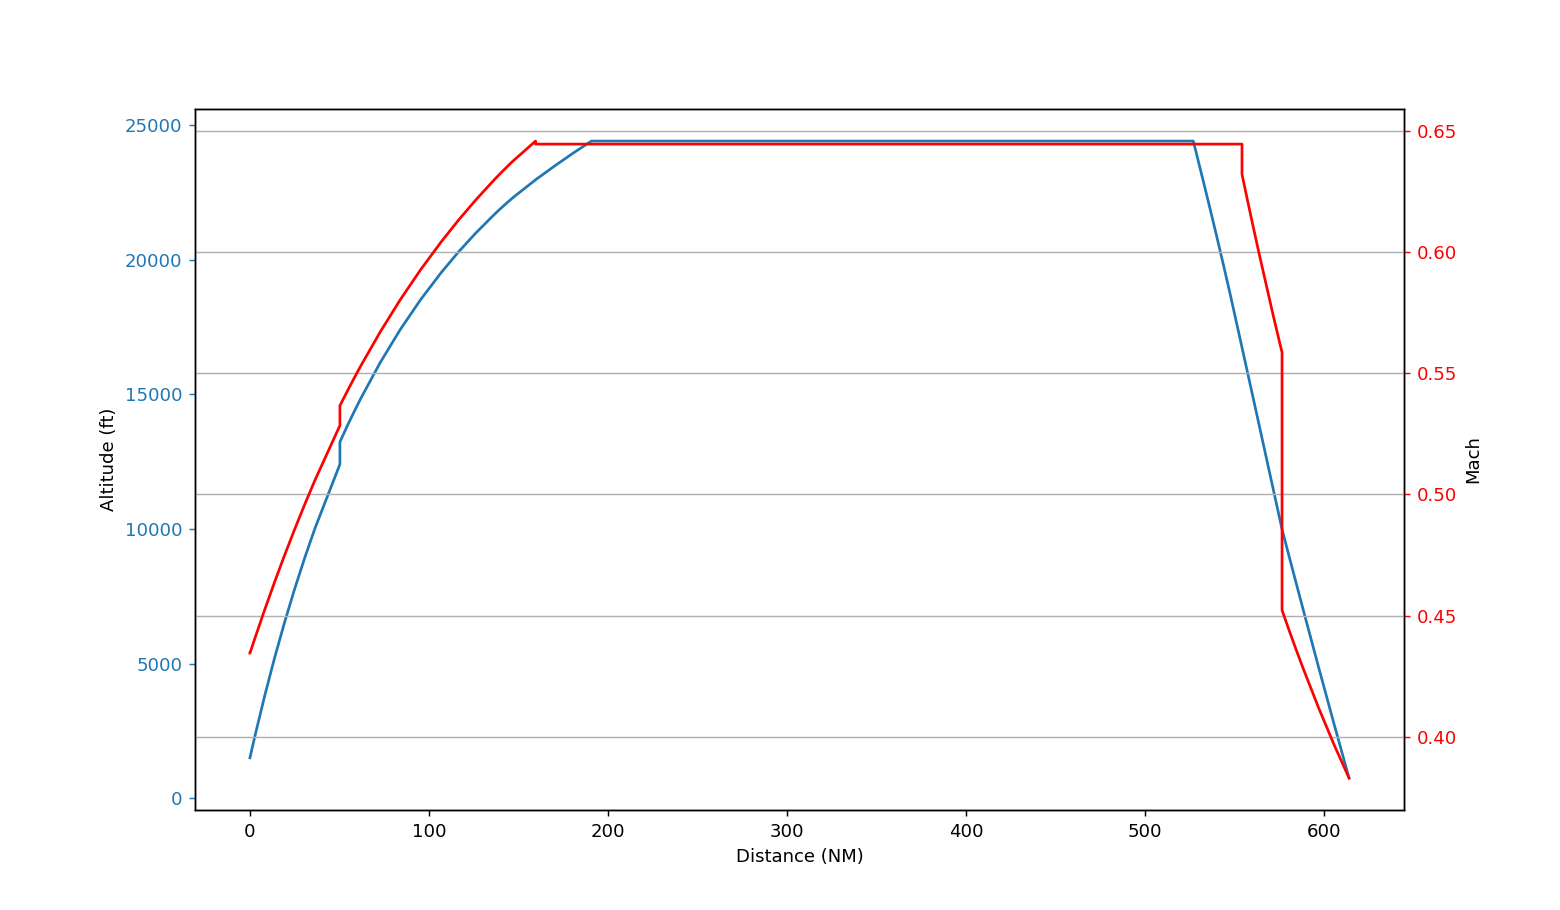

In [348]:
altitude = np.array(output["altitude"][0].split(']')[0].split('[')[1].split()).astype(float)
mach = np.array(output["mach"][0].split(']')[0].split('[')[1].split()).astype(float)
distance = np.array(output["distance"][0].split(']')[0].split('[')[1].split()).astype(float)
draw_figure(distance,altitude, mach, "Distance (NM)", "Altitude (ft)", "Mach")

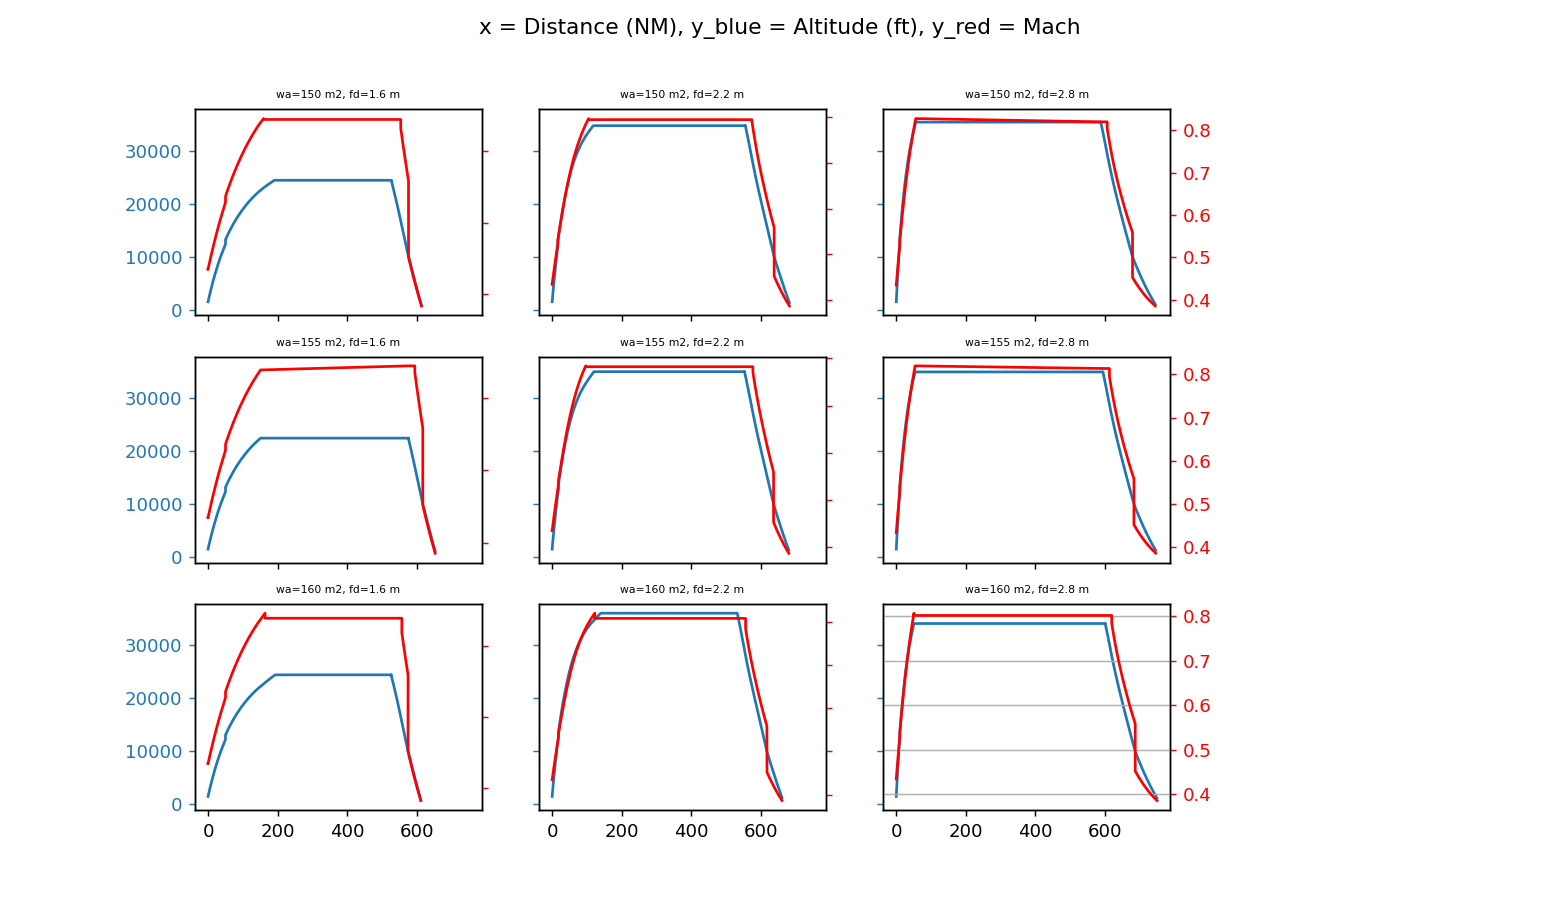

In [355]:
draw_figure_alt_mach_multi(np.array(output["distance"]),np.array(output["altitude"]),np.array(output["mach"]), 3, 3, "Distance (NM)", "Altitude (ft)", "Mach", input["WingArea"],input["FanDiameter"]/10)

In [284]:
input["WingArea"]

0     135.0
1     135.0
2     135.0
3     135.0
4     140.0
5     140.0
6     140.0
7     140.0
8     145.0
9     145.0
10    145.0
11    145.0
12    150.0
13    150.0
14    150.0
15    150.0
Name: WingArea, dtype: float64

0
1
2
3
4
